### Super Store Analysis
Author: Abdallah Moataz Kamal 

For: Brainwave Matrix Solutions 


### About dataset

Row ID => Unique ID for each row.

Order ID => Unique Order ID for each Customer.

Order Date => Order Date of the product.

Ship Date => Shipping Date of the Product.

Ship Mode=> Shipping Mode specified by the Customer.

Customer ID => Unique ID to identify each Customer.

Customer Name => Name of the Customer.

Segment => The segment where the Customer belongs.

Country => Country of residence of the Customer.

City => City of residence of of the Customer.

State => State of residence of the Customer.

Postal Code => Postal Code of every Customer.

Region => Region where the Customer belong.

Product ID => Unique ID of the Product.

Category => Category of the product ordered.

Sub-Category => Sub-Category of the product ordered.

Product Name => Name of the Product

Sales => Sales of the Product.

Quantity => Quantity of the Product.

Discount => Discount provided.

Profit => Profit/Loss incurred.

In [311]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
from sklearn.cluster import KMeans

In [312]:
df=pd.read_csv('/kaggle/input/superstore-dataset-final/Sample - Superstore.csv',encoding='latin1')

In [313]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,262.0,2,0.0,41.9
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9,3,0.0,219.6


In [314]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [315]:
df.shape

(9994, 21)

In [316]:
df.nunique()

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64

In [317]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,"9,994.0","9,994.0","9,994.0","9,994.0","9,994.0","9,994.0"
mean,"4,997.5","55,190.4",229.9,3.8,0.2,28.7
std,"2,885.2","32,063.7",623.2,2.2,0.2,234.3
min,1.0,"1,040.0",0.4,1.0,0.0,"-6,600.0"
25%,"2,499.2","23,223.0",17.3,2.0,0.0,1.7
50%,"4,997.5","56,430.5",54.5,3.0,0.2,8.7
75%,"7,495.8","90,008.0",209.9,5.0,0.2,29.4
max,"9,994.0","99,301.0","22,638.5",14.0,0.8,"8,400.0"


# Data Cleaning 

In [318]:
df.isnull().sum()/df.shape[0]

Row ID          0.0
Order ID        0.0
Order Date      0.0
Ship Date       0.0
Ship Mode       0.0
Customer ID     0.0
Customer Name   0.0
Segment         0.0
Country         0.0
City            0.0
State           0.0
Postal Code     0.0
Region          0.0
Product ID      0.0
Category        0.0
Sub-Category    0.0
Product Name    0.0
Sales           0.0
Quantity        0.0
Discount        0.0
Profit          0.0
dtype: float64

In [319]:
duplicates=df.duplicated()
duplicates.sum()

0

In [320]:
df.columns=df.columns.str.strip().str.replace(" ","_").str.replace('-','_')


In [321]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [322]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'])


In [323]:
df.dtypes

Row_ID                    int64
Order_ID                 object
Order_Date       datetime64[ns]
Ship_Date        datetime64[ns]
Ship_Mode                object
Customer_ID              object
Customer_Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal_Code               int64
Region                   object
Product_ID               object
Category                 object
Sub_Category             object
Product_Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [324]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [325]:
Category=df['Category'].value_counts()
Category

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

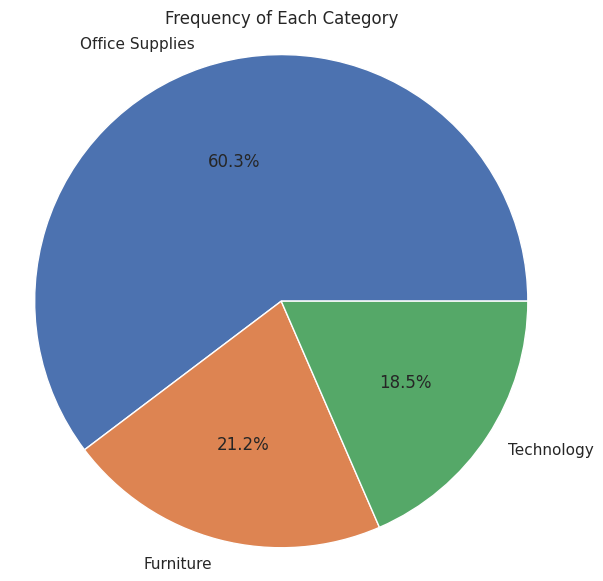

In [326]:
plt.figure(figsize=(7,7))
plt.pie(Category,labels=Category.index,autopct='%1.1f%%')
plt.title('Frequency of Each Category')
plt.axis('equal')
plt.show()

Category
Technology        836,154.0
Furniture         741,999.8
Office Supplies   719,047.0
Name: Sales, dtype: float64


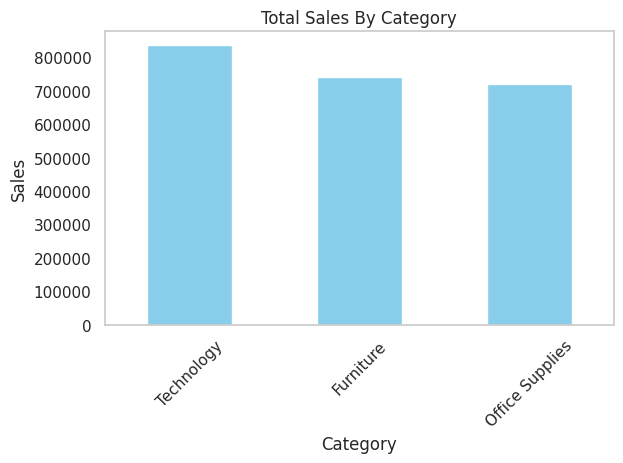

In [327]:
categ_sales=df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print(categ_sales)
categ_sales.plot(kind='bar',color='skyblue')
plt.title('Total Sales By Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()


In [328]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [329]:
df['Sub_Category'].value_counts()

Sub_Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64

In [330]:
subcat=df.groupby('Sub_Category')[['Profit','Sales']].sum().sort_values(by='Profit',ascending=False)
subcat

,Profit,Sales
Sub_Category,,
Copiers,"55,617.8","149,528.0"
Phones,"44,515.7","330,007.1"
Accessories,"41,936.6","167,380.3"
Paper,"34,053.6","78,479.2"
Binders,"30,221.8","203,412.7"
Chairs,"26,590.2","328,449.1"
Storage,"21,278.8","223,843.6"
Appliances,"18,138.0","107,532.2"
Furnishings,"13,059.1","91,705.2"


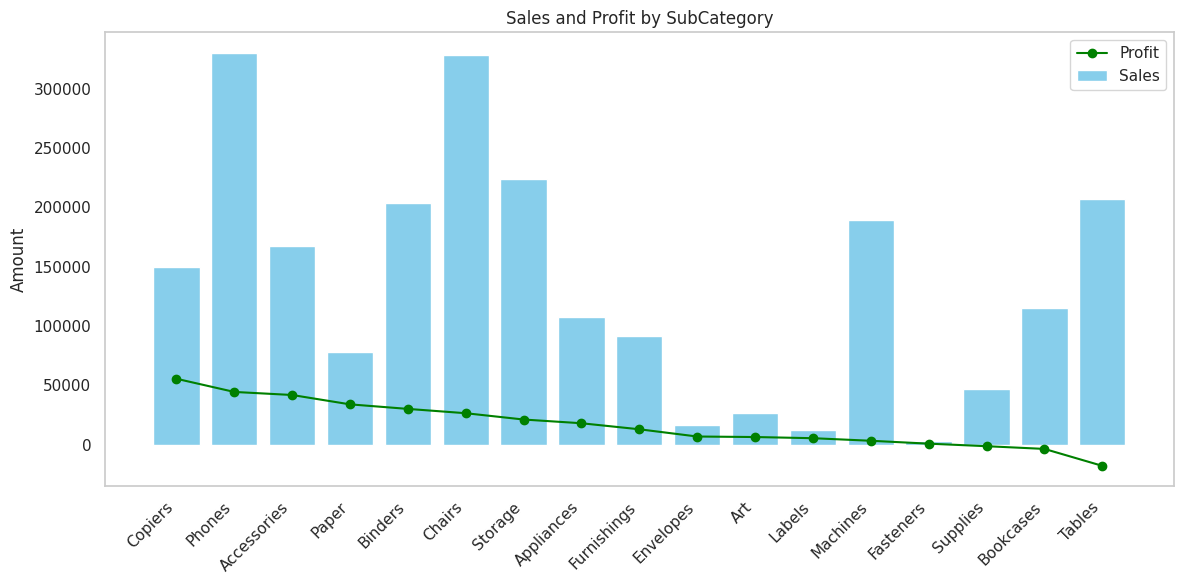

In [331]:
plt.figure(figsize=(12,6))
plt.bar(subcat.index, subcat['Sales'], color='skyblue', label='Sales')
plt.plot(subcat.index, subcat['Profit'], color='green', marker='o', label='Profit')
plt.xticks(rotation=45, ha='right')
plt.title('Sales and Profit by SubCategory')
plt.ylabel('Amount')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

In [332]:
most_sales_profit_region=df.groupby('Region')[['Sales','Profit']].sum().sort_values(by='Profit',ascending=False)
most_sales_profit_region

,Sales,Profit
Region,,
West,"725,457.8","108,418.4"
East,"678,781.2","91,522.8"
South,"391,721.9","46,749.4"
Central,"501,239.9","39,706.4"


In [333]:
fig = px.bar(
    most_sales_profit_region.reset_index(), 
    x='Region',
    y='Profit',
    color='Profit',
    title='Total Profit by Region',
    hover_data=['Sales', 'Profit']
)

fig.update_layout(
    xaxis_showgrid=False,
    yaxis_showgrid=False
)

fig.show()

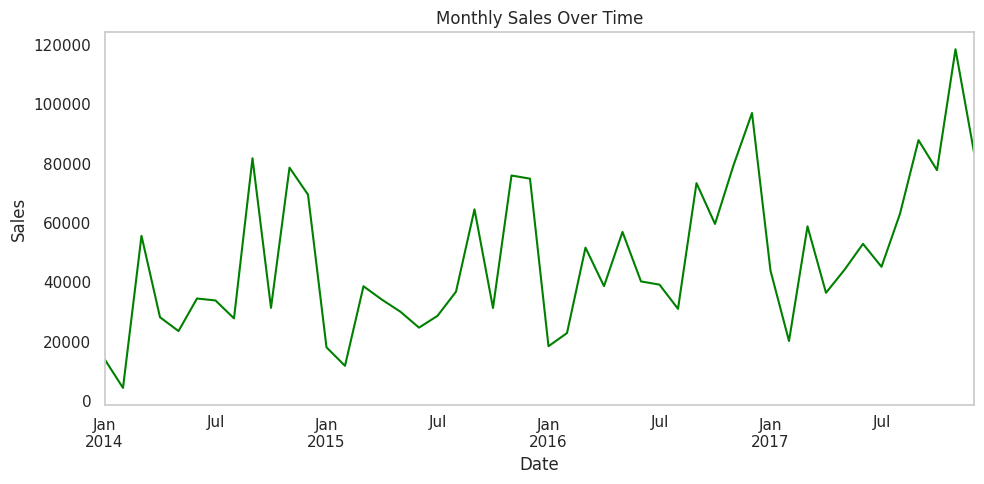

In [334]:
Monthly_sales=df.resample('ME',on='Order_Date')['Sales'].sum()
Monthly_sales.plot(kind='line',figsize=(10,5),color='green')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(False)
plt.tight_layout()
plt.show()

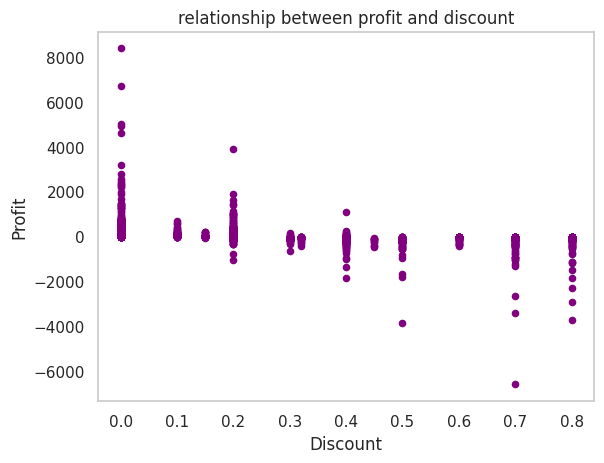

In [335]:
df.plot(kind='scatter',
        x='Discount',
        y='Profit',
       color='purple')
plt.title('relationship between profit and discount',fontsize=12)
plt.xlabel('Discount',fontsize=12)
plt.ylabel('Profit',fontsize=12)
plt.grid(False)
plt.show()


In [336]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [337]:
df['Segment'].value_counts()

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

                  Sales    Profit
Segment                          
Consumer    1,161,401.3 134,119.2
Corporate     706,146.4  91,979.1
Home Office   429,653.1  60,298.7


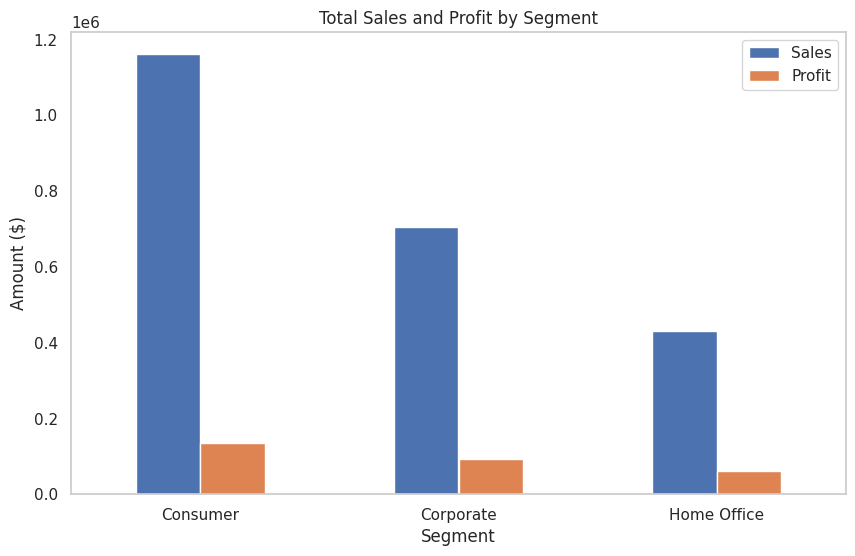

In [338]:
pd.options.display.float_format = '{:,.1f}'.format
segment_sales_profit = df.groupby('Segment')[['Sales', 'Profit']].sum().sort_values(by='Profit', ascending=False)
print(segment_sales_profit)
ax = segment_sales_profit.plot(kind='bar', figsize=(10,6))
plt.title('Total Sales and Profit by Segment')
plt.xlabel('Segment')
plt.ylabel('Amount ($)')
plt.xticks(rotation=0)
plt.grid(False)


In [339]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

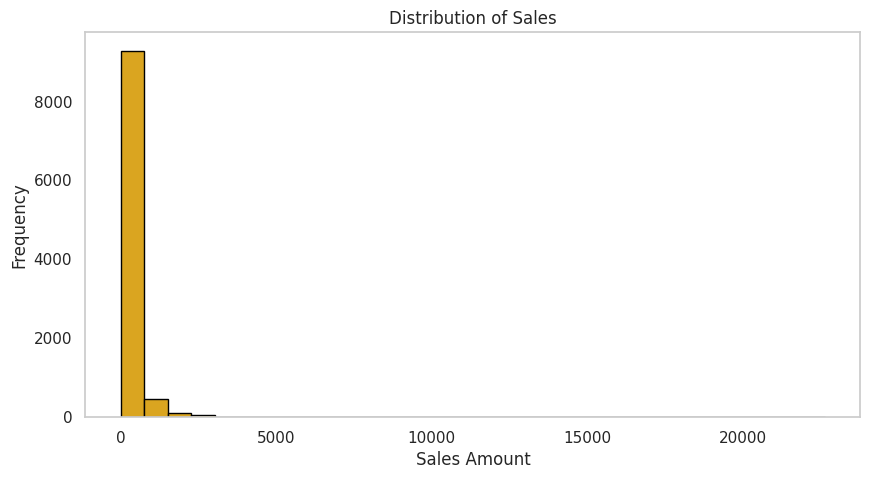

In [340]:
plt.figure(figsize=(10,5))
plt.hist(df['Sales'],bins=30,color='goldenrod',edgecolor='black')
plt.title('Distribution of Sales')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



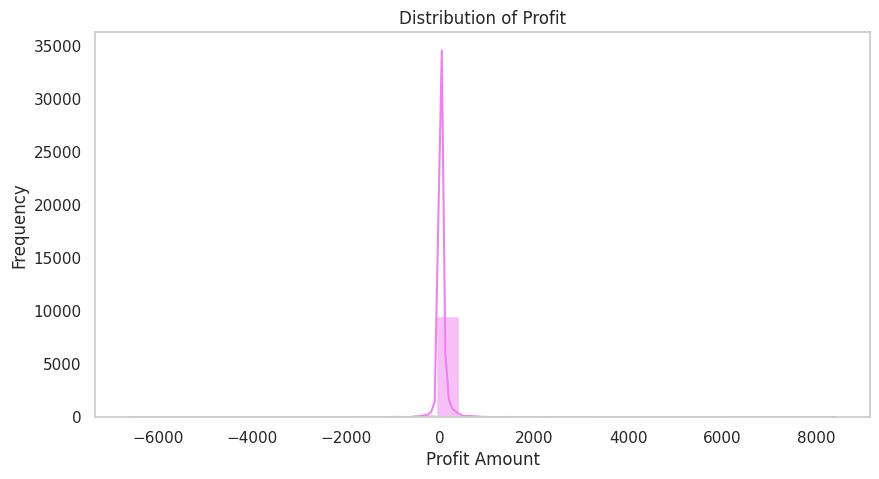

In [341]:
plt.figure(figsize=(10,5))
sns.histplot(df['Profit'],bins=30,color='violet',kde=True)
plt.title('Distribution of Profit')
plt.xlabel('Profit Amount')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [342]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [343]:
Customer_df=df.groupby('Customer_ID').agg({
    'Sales':'sum',
    'Quantity':'sum',
    'Profit':'sum',
    'Discount':'mean'
}).reset_index()

In [344]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(Customer_df[features])

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

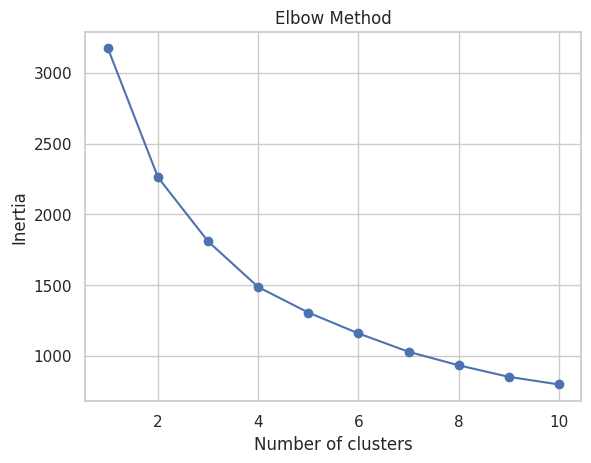

In [345]:
inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)
plt.plot(range(1,11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [346]:
Kmeans=KMeans(n_clusters=4,random_state=42)
Customer_df['Cluster']=kmeans.fit_predict(scaled_data)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



<Axes: xlabel='Sales', ylabel='Profit'>

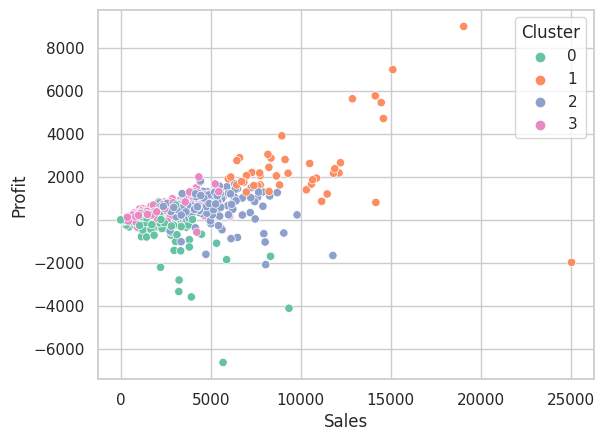

In [348]:
sns.scatterplot(data=Customer_df, x='Sales', y='Profit', hue='Cluster',color='skyblue',palette='Set2')


In [349]:
top_customers = Customer_df.sort_values(by=['Profit'], ascending=False).head(10)
print(top_customers[['Customer_ID', 'Sales','Profit', 'Cluster']])


    Customer_ID    Sales  Profit  Cluster
741    TC-20980 19,052.2 8,981.3        1
621    RB-19360 15,117.3 6,976.1        1
669    SC-20095 14,142.3 5,757.4        1
327    HL-15040 12,873.3 5,622.4        1
6      AB-10105 14,473.6 5,444.8        1
730    TA-21385 14,595.6 4,703.8        1
160    CM-12385  8,954.0 3,899.9        1
424    KD-16495  8,181.3 3,038.6        1
48     AR-10540  6,608.4 2,884.6        1
234    DR-12940  8,350.9 2,869.1        1


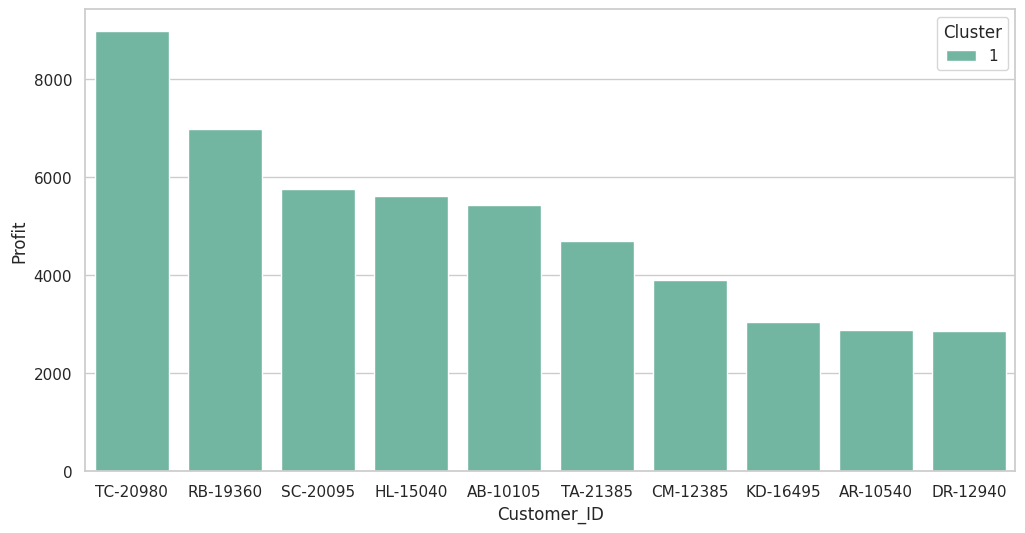

In [357]:
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(
    data=top_customers,
    x='Customer_ID',
    y='Profit',
    hue='Cluster',
    palette='Set2')
